## IMPORTS

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pd.set_option('display.max_columns', None)

## LOADING TABLES

In [2]:
artists = pd.read_csv('/Users/spennyfinn/Documents/Projects/music_streaming_pipeline/exports/artist.csv')
songs= pd.read_csv('/Users/spennyfinn/Documents/Projects/music_streaming_pipeline/exports/songs.csv')
audio_features= pd.read_csv('/Users/spennyfinn/Documents/Projects/music_streaming_pipeline/exports/song_audio_features.csv')
albums= pd.read_csv('/Users/spennyfinn/Documents/Projects/music_streaming_pipeline/exports/albums.csv')
genres = pd.read_csv('/Users/spennyfinn/Documents/Projects/music_streaming_pipeline/exports/genres.csv')
artist_genres=pd.read_csv('/Users/spennyfinn/Documents/Projects/music_streaming_pipeline/exports/artist_genres.csv')

## EDA

In [3]:
tables = [('artists', artists), 
          ('song', songs), 
          ('audio-features',audio_features), 
          ('albums',albums), 
          ('genres', genres), 
          ('artist_genres', artist_genres)]

for name, table in tables:
    print(f'TABLE: {name}')
    display(table.head())
    display(table.tail())

TABLE: artists


,artist_id,artist_name,on_tour,total_listeners,total_playcount,plays_per_listener,updated_at,created_at,artist_popularity,artist_followers,has_genres
0,1mmehjf7eHA10uHMisZGJg,!!!,f,715034,13480968,18.85360,2026-01-07 11:26:17.828907,2025-12-30 12:49:01.771482,40.0,167729.0,t
1,1T0dilXQ364ci4Sl22Kn9n,!dav1d,f,26895,664955,24.72411,2026-01-12 20:11:44.619806,2025-12-30 12:23:41.104602,45.0,11066.0,f
2,0bw7sLDsNQTScMpmsNFukJ,!llmind,f,0,0,NaN,2026-01-07 18:16:08.127721,2026-01-07 18:16:07.462465,NaN,NaN,f
3,7jIatzICMzzRvLvybs5Gzk,!mxthod,f,3056,11826,3.86976,2026-01-12 20:58:36.511327,2026-01-07 15:02:12.458915,NaN,NaN,f
4,3OaHCFKRFT4r8o1x6SdgPT,!nfnx,f,2303,8550,3.71255,2026-01-12 19:30:38.957232,2026-01-07 10:11:07.764691,NaN,NaN,f


,artist_id,artist_name,on_tour,total_listeners,total_playcount,plays_per_listener,updated_at,created_at,artist_popularity,artist_followers,has_genres
114147,6tOzIqlpQBKAFIqdhmTfiW,髥莏,f,0,0,NaN,2025-12-30 12:21:38.525733,2025-12-30 12:21:38.525733,27.0,7241.0,t
114148,2wBpW4bAGYVe0yJcBeCTyd,２８１４,f,217683,6738945,30.95761,2026-01-02 14:50:01.307171,2026-01-01 18:46:22.389994,39.0,85889.0,t
114149,1LrNcLVRagm7lIZObqMRx0,ｂｏｋｋｅｎ 木剣,f,0,0,NaN,2026-01-01 18:45:09.813489,2026-01-01 18:45:09.813489,NaN,NaN,f
114150,0TOVNcF0HvbUkixERyyiCA,ｎｏｓｔｒａｄａｍｕｓ,f,3386,31692,9.35972,2026-01-07 11:21:01.018023,2026-01-07 09:33:16.42742,NaN,NaN,f
114151,4F8OvpfT26bzCmzuUpcMzF,ｏｃｅａｎ ｓｈｏｒｅｓ,f,29447,573728,19.48341,2026-01-12 21:42:02.020909,2026-01-07 13:50:04.396909,NaN,NaN,f


TABLE: song


,song_id,song_name,artist_id,album_id,song_listeners,mbid,duration_ms,duration_seconds,duration_minutes,engagement_ratio,release_date,release_date_precision,is_explicit,popularity,track_number,is_playable,created_at,updated_at
0,5tqPD8ipRNRgVE3E02gxBS,!!!!jealous,1vkWdqcabQ1swciXipkLBj,5UbTuxTQPcYBvhK9pkphmE,1871,b0979956-e40d-4a35-89b1-124af2288354,120280,120,2.00,0.00267,2025-04-18,day,t,16,1,t,2025-12-30 13:07:49.360754,2026-01-02 14:12:51.746497
1,3O2dacx8I8Z9pDrEc65cHu,!?,2wvTwsc93H5xfsHE6QK1nl,3eMGFaCiJQvY44XvLwwsRz,52468,49bac834-4b4c-478f-93ae-323148bbe47a,111504,111,1.85,0.44216,2020-12-15,day,t,45,1,t,2026-01-07 09:36:54.646452,2026-01-07 11:19:46.522625
2,07eWLZke8ZCN1RIBziDhr3,!negative,5PmnU0FaFDg8T5VWmPidyy,50PhqXNQr1TJJXHFZ3FLvO,0,NaN,103750,103,1.72,NaN,2024-04-20,day,f,17,20,t,2026-01-07 11:37:51.422205,2026-01-07 11:41:13.658711
3,2z0LmeqmAlLsaTG63OwQ5g,!resident evil,2j08aS9NK6tcST4pG1KRXr,03eawc7vQ6zBcWPIPFohVW,0,NaN,122483,122,2.03,NaN,2025-09-06,day,f,7,1,t,2026-01-07 18:16:40.423692,2026-01-07 18:16:43.174671
4,4RMK0c30Vl3DGG50wOLpab,"""...and accordinge as i desired ther cam a let...",0Ty63ceoRnnJKVEYP0VQpk,04GSMZ8zc5UwrjlTALc1kI,11100,7944ed53-2a58-4035-9b93-140a71e41c34,55720,55,0.92,0.00413,2006,year,f,1,9,t,2025-12-30 12:23:42.215427,2026-01-01 20:02:35.309086


,song_id,song_name,artist_id,album_id,song_listeners,mbid,duration_ms,duration_seconds,duration_minutes,engagement_ratio,release_date,release_date_precision,is_explicit,popularity,track_number,is_playable,created_at,updated_at
333865,3HRQlB5arYBrirosCP4Lrq,＜celebrate＞スペシャルメドレー - little glee monster 10t...,2N19kPGlqKY8GiyE4DkAtp,7ll27GNHhdjotiF508lz5b,733,466e197e-1d82-441e-82c4-380b97fd1839,593352,593,9.88,0.01174,2025-10-19,day,f,33,4,t,2026-01-01 18:24:08.107536,2026-01-02 18:03:49.436877
333866,2GnjxQ0xGjaTyUM2lWP59p,ｉｎｊｕｒｙ,6irREslC8D12TQCoB2UFgP,1kCtu0qlIoAxJHIkGd37db,4170,NaN,90491,90,1.50,0.35051,2025-09-02,day,t,42,5,t,2026-01-06 20:47:45.900302,2026-01-06 23:05:30.570608
333867,33RRvEsIlQMKIFWsbPjhqW,ｍａｒｋｅｔｉｎｇ ｓｔｒａｔｅｇｙ,4pG6hTUl9HhyftfJQQI7np,19fhEjeFAvXLfmcLhWdCyM,251,NaN,89196,89,1.48,0.00249,2021-04-02,day,f,1,2,t,2026-01-07 09:59:31.937239,2026-01-07 11:06:55.675419
333868,7lx9ahLiuVTK1ArFp9yAmL,ｗ●ｒｋ,3PvbcfORzI3TVPlBxsTmhU,3SISWKWKOQ82ScPByFShaI,67144,NaN,201073,201,3.35,0.58815,2023-04-01,day,f,64,1,t,2026-01-07 18:19:55.986482,2026-01-12 19:13:06.087262
333869,2Sf4UeImpFj5Esa5ndsIqr,｢the art of fun｣ (raj),4lAk1EpBbxg4jIS0AcerHp,4qA36qeCdNtBVUtYYvbtJJ,5048,NaN,207813,207,3.45,0.08128,2013-12-20,day,f,31,4,t,2026-01-01 18:36:26.20397,2026-01-01 23:14:52.457563


TABLE: audio-features


,song_id,bpm,energy,spectral_centroid,zero_crossing_rate,danceability,preview_url,harmonic_ratio,percussive_ratio,analysis_date
0,0008IPeppDTYa718PUDx2u,143.555,0.14089,2840.898,0.10469,0.30672,https://p.scdn.co/mp3-preview/c033e97cf9fcb34f...,0.57813,0.42187,2026-01-07 15:07:39.496286
1,000LW3O97XPr9lQ9rmQ6PX,0.000,0.15378,145.715,0.00830,0.07855,https://p.scdn.co/mp3-preview/249034d2006abd70...,0.91263,0.08737,2026-01-01 20:22:45.325163
2,000TJlEJQ3nafsm1hBWpoj,135.999,0.16379,2312.848,0.10800,0.30749,https://p.scdn.co/mp3-preview/926826525a487214...,0.62414,0.37586,2026-01-07 15:07:39.495713
3,000zYgBirXxgFkpAXOt0EB,112.347,0.15744,2676.543,0.12071,0.27138,https://p.scdn.co/mp3-preview/9ec10940ab28c537...,0.44074,0.55926,2026-01-01 20:22:45.325479
4,00199FIJyFpSTVEd87qkUr,151.999,0.40553,1545.934,0.04323,0.43941,https://p.scdn.co/mp3-preview/312f34034f4df4cf...,0.71440,0.28560,2026-01-01 20:22:45.325894


,song_id,bpm,energy,spectral_centroid,zero_crossing_rate,danceability,preview_url,harmonic_ratio,percussive_ratio,analysis_date
89736,7zw6nQHTwml1mVuQDf5V6k,143.555,0.13190,1445.425,0.06220,0.29372,https://p.scdn.co/mp3-preview/4b1784903a8ed733...,0.78261,0.21739,2026-01-06 15:45:49.042337
89737,7zxE9xODddOa7Bn5WIeVp8,89.103,0.17966,2837.970,0.08383,0.24025,https://p.scdn.co/mp3-preview/f2bd8e0207c9490e...,0.68661,0.31339,2026-01-06 14:50:37.709966
89738,7zxlrvxuxCSkithrSvAdAQ,123.047,0.31349,2023.985,0.07535,0.35639,https://p.scdn.co/mp3-preview/e68be63a27559391...,0.74456,0.25544,2026-01-06 13:25:08.553291
89739,7zyqJJ0QwajaHaPLCqZFXN,103.359,0.23070,2616.229,0.10704,0.29180,https://p.scdn.co/mp3-preview/fe09229c4a17cc8c...,0.61650,0.38350,2026-01-20 19:32:59.300738
89740,7zzCWZcT2lwIYrw7HeBMeI,151.999,0.24689,1051.345,0.04002,0.35945,https://p.scdn.co/mp3-preview/b23f2e02f2f92b3e...,0.68497,0.31503,2026-01-01 22:24:31.960724


TABLE: albums


,album_id,album_title,artist_id,album_type,album_total_tracks,created_at,updated_at
0,2cbGI3oi9hoiYBaILgsL9U,!,4vFvy7t3jlzAYrNYjW8uDo,album,9,2025-12-30 12:23:41.406177,2026-01-06 19:51:52.371138
1,22DhBLmCgazpW9lpcx8cAh,!,0HLqA7o0asZtoaAB7cDKD5,single,2,2025-12-30 13:24:57.897415,2025-12-30 13:24:57.897415
2,6IHoEVtbUxL2mnOjb9Mi9T,!,1jQ7vJd424xOGCWHweV63F,single,3,2026-01-07 13:23:13.489781,2026-01-07 13:26:47.584888
3,55SKmLDZfSn5Iusi5EuPjm,! ! ! ! ! ! continuous ! ! ! ! ! !,0gi6ycz9QctUWhoJRlIlBg,album,30,2026-01-07 18:35:05.944193,2026-01-07 18:38:23.249446
4,0OZFU16R5SoTNXnhuU3nHl,! ! ! ! perfect time again,4W12lEvVl5wectUtRNrvDh,album,42,2026-01-07 18:14:45.72816,2026-01-07 18:14:47.105315


,album_id,album_title,artist_id,album_type,album_total_tracks,created_at,updated_at
232495,3SISWKWKOQ82ScPByFShaI,ｗ●ｒｋ,3PvbcfORzI3TVPlBxsTmhU,single,1,2026-01-07 18:19:55.983156,2026-01-07 18:19:55.983156
232496,5cfjmEZyNmkSDk0LBLhLRL,｢last-resort investigator｣original soundtrack,0F4ybIPzwLfT5xzZQlYBXP,album,26,2026-01-06 21:21:40.040336,2026-01-06 22:36:12.270833
232497,6Js5ZlzQWvDUl7MFh3lXHo,｢会長はメイド様!｣キャラクターコンセプトcd2-maid side-,1uRrxWVWyfnD8HyX0ewcr8,single,4,2026-01-06 19:06:51.099183,2026-01-06 19:11:20.522091
232498,75ihBn7ZVyRjU9gV0u4g3P,｢転生したら剣でした｣オリジナルサウンドトラック,64mecceQewFCKwCK6JBW0o,album,50,2026-01-06 21:04:32.410568,2026-01-06 21:09:03.615503
232499,6cqpOWzO3dSGB5YtSPnmK1,𝖈𝖆𝖙𝖍𝖆𝖗𝖘𝖎𝖘,6KcO5SP29TcN4Ii7dwznX6,album,8,2025-12-30 13:07:50.335456,2025-12-30 13:07:50.335456


TABLE: genres


,genre_id,genre_name,created_at
0,1,latin,2026-01-13 14:19:13.628011
1,2,bachata,2026-01-13 14:19:13.632568
2,3,electro swing,2026-01-13 14:19:13.632818
3,4,corridos tumbados,2026-01-13 14:19:13.632962
4,5,dembow belico,2026-01-13 14:19:13.633079


,genre_id,genre_name,created_at
726,41229,funkot,2026-01-20 17:38:56.689809
727,41279,norteño-sax,2026-01-20 17:40:41.528384
728,42745,huayno,2026-01-20 18:19:11.847819
729,42815,karadeniz folk,2026-01-20 18:20:57.173484
730,42843,rap québécois,2026-01-20 18:21:49.867523


TABLE: artist_genres


,artist_id,genre_id,created_at
0,006ibfxHXj6ewIkihKcaS2,8925,2026-01-20 15:47:33.119306
1,006ibfxHXj6ewIkihKcaS2,9005,2026-01-20 15:47:33.120084
2,006ibfxHXj6ewIkihKcaS2,9133,2026-01-20 15:47:33.120223
3,006ibfxHXj6ewIkihKcaS2,9229,2026-01-20 15:47:33.119849
4,00AFbqxvdDK6T1D6MQZ9c1,8864,2026-01-16 15:31:56.642705


,artist_id,genre_id,created_at
36723,7zunzYjx0hxl0uOHl9l3aJ,8858,2026-01-20 16:55:08.033442
36724,7zunzYjx0hxl0uOHl9l3aJ,10752,2026-01-20 16:55:08.033261
36725,7zxS4o4zmwxJNe5UvC2Fx5,9071,2026-01-20 15:14:05.062889
36726,7zyObVag8rUjItn71SkIrh,8865,2026-01-19 11:35:57.097012
36727,7zyObVag8rUjItn71SkIrh,8866,2026-01-19 11:35:57.097159


## DROPPING COLUMS FROM TABLES

In [4]:
songs_col_to_drop=['mbid', 'duration_ms', 'duration_seconds', 'is_playable', 'created_at', 'updated_at', 'release_date_precision']
songs.drop(songs_col_to_drop, axis=1, inplace=True)
print(songs.columns)

Index(['song_id', 'song_name', 'artist_id', 'album_id', 'song_listeners',
       'duration_minutes', 'engagement_ratio', 'release_date', 'is_explicit',
       'popularity', 'track_number'],
      dtype='object')


In [5]:
artist_cols_to_drop=['on_tour', 'updated_at', 'created_at', 'has_genres']
artists.drop(artist_cols_to_drop, axis=1, inplace=True)
print(artists.columns)

Index(['artist_id', 'artist_name', 'total_listeners', 'total_playcount',
       'plays_per_listener', 'artist_popularity', 'artist_followers'],
      dtype='object')


In [6]:
albums_cols_to_drop=['created_at', 'updated_at']
albums.drop(albums_cols_to_drop, axis=1, inplace=True)
print(albums.columns)

Index(['album_id', 'album_title', 'artist_id', 'album_type',
       'album_total_tracks'],
      dtype='object')


In [7]:
audio_features_cols_to_drop= ['analysis_date', 'preview_url', 'percussive_ratio']
audio_features.drop(audio_features_cols_to_drop, axis=1, inplace=True)
print(audio_features.columns)

Index(['song_id', 'bpm', 'energy', 'spectral_centroid', 'zero_crossing_rate',
       'danceability', 'harmonic_ratio'],
      dtype='object')


In [8]:
genres_cols_to_drop= ['created_at']
genres.drop(genres_cols_to_drop, axis=1, inplace=True)
print(genres.columns)

Index(['genre_id', 'genre_name'], dtype='object')


In [9]:
artist_genres_cols_to_drop= ['created_at']
artist_genres.drop(artist_genres_cols_to_drop, axis=1, inplace=True)
print(artist_genres.columns)

Index(['artist_id', 'genre_id'], dtype='object')


In [10]:
def get_table_attributes(df, name):
    print(f"Showing the attributes for table: {name}")
    print()
    print(f"Shape: {df.shape}")
    print()
    print(f"Num of Nulls:\n{df.isnull().sum()}")
    print()
    print(f'Num of Duplicate Rows: {df.duplicated().sum()}')
    print()
    print(f"Data Types: {df.dtypes}")
    print()
    print(f"Summary Stats: {df.describe()}")
    print()
    

In [11]:
for name, table in tables:
    get_table_attributes(table, name)

Showing the attributes for table: artists

Shape: (114152, 7)

Num of Nulls:
artist_id                 0
artist_name               1
total_listeners           0
total_playcount           0
plays_per_listener    24692
artist_popularity     90471
artist_followers      90471
dtype: int64

Num of Duplicate Rows: 0

Data Types: artist_id              object
artist_name            object
total_listeners         int64
total_playcount         int64
plays_per_listener    float64
artist_popularity     float64
artist_followers      float64
dtype: object

Summary Stats:        total_listeners  total_playcount  plays_per_listener  \
count     1.141520e+05     1.141520e+05        89460.000000   
mean      7.939374e+04     2.401668e+06           13.686080   
std       3.000511e+05     2.466791e+07           37.349150   
min       0.000000e+00     0.000000e+00            1.000000   
25%       1.320000e+02     6.070000e+02            5.432405   
50%       5.706500e+03     4.541950e+04            8.8157

### OBSERVATIONS:
- Artists: There are 114,000 rows but only ~20k have popularity/followers, so there are a lot of the artists are "unknown" in that dimension(s). When data is available they show a skewed profile, median popularity is 46 but mean follower count is near one million with a long tail reaching up to 170 million followers. A few superstar artists dominate the table while most artist sit well below that.
- Songs: There is complete popularity coverage over the 334,000 tracks, but engagementratio is missing for roughly 65,000 entries. Durations cluster tightly around the 3-4 minute mark (radio-friendly), while listeners has a massive range (single digits to tens of millions) reflecting hits and under-the-radar songs.
- Audio Features: Only 68,000 songs have audio feature, but where they exists the ranges are sensible. BPM hovers around 100-140, danceability is near .3, and harmonic ratio averages at ~.7.
- Albums: With 232,000 albums averaging ~9 tracks, the dataset captures a mix of singles/short EPs and larger collections (max 579 tracks), so you’re seeing both typical releases and massive compilations. Album titles are almost always populated, so any text-based analyses won’t be hampered by nulls.
- Genres + artist_genres: The genre list is compact (718 unique labels) and no missing values, while the 24K artist-genre pairs imply most artists are aligned with one or two styles. That makes genre a clean categorical axis to explore.

## FILTERING DATASET

In [12]:
print(f"Length of Songs table before filtering: {len(songs)}")
songs = songs[((songs['popularity']>0) & (songs['song_listeners']>0) &(songs['engagement_ratio']<2))]
print(f"Length of Songs table after filtering: {len(songs)}")

Length of Songs table before filtering: 333870
Length of Songs table after filtering: 266608


In [13]:
songs[songs.isna().any(axis=1)]

,song_id,song_name,artist_id,album_id,song_listeners,duration_minutes,engagement_ratio,release_date,is_explicit,popularity,track_number
209255,1qJ2Ejq5YKmkB2nYj4rztt,NaN,1kSYO9KsvEAGqTdsrBXbRu,5tDBRIweqYa74z7yc5rqTl,11561,2.92,0.66615,2025-07-11,t,56,1
218961,4SaDobdtZCr2kB0HdXgGsc,NaN,3tIzE1MQigIhocuWtGBNrx,7cHvJpTVGuum5Y69ZbKUmg,7968,3.32,0.11627,2017-11-01,f,23,10


In [14]:
songs['song_name'].dropna(inplace=True)
print(f"Length of Songs table after dropping nulls in song_name column: {len(songs)}")

Length of Songs table after dropping nulls in song_name column: 266608


/var/folders/9v/g0l2v7dn7b72486f6lzl24f40000gn/T/ipykernel_15177/1913191864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['song_name'].dropna(inplace=True)


In [15]:
artists[artists.isna().any(axis=1)]

,artist_id,artist_name,total_listeners,total_playcount,plays_per_listener,artist_popularity,artist_followers
2,0bw7sLDsNQTScMpmsNFukJ,!llmind,0,0,NaN,NaN,NaN
3,7jIatzICMzzRvLvybs5Gzk,!mxthod,3056,11826,3.86976,NaN,NaN
4,3OaHCFKRFT4r8o1x6SdgPT,!nfnx,2303,8550,3.71255,NaN,NaN
5,25vPN9mfN8kqkUfWFQaUzY,!nnoluvv,0,0,NaN,NaN,NaN
6,13UHj3SsHDkAfGEJShPm7q,!nterestng,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
114146,3rWJqI55ysYgFzbR5ZhX5s,회사auto,51530,600332,11.65015,NaN,NaN
114147,6tOzIqlpQBKAFIqdhmTfiW,髥莏,0,0,NaN,27.0,7241.0
114149,1LrNcLVRagm7lIZObqMRx0,ｂｏｋｋｅｎ 木剣,0,0,NaN,NaN,NaN
114150,0TOVNcF0HvbUkixERyyiCA,ｎｏｓｔｒａｄａｍｕｓ,3386,31692,9.35972,NaN,NaN


In [16]:
print(f"Length of Artists table after filtering: {len(artists)}")
artists=artists[((artists['artist_popularity'].notna())&
                 artists['total_listeners']>0)& 
                 (artists['plays_per_listener'].notna())& 
                 (artists['total_playcount']>0)& 
                 (artists['artist_name'].notna()) &
                 (artists['artist_followers'].notna())
                 ]
print(f"Length of Artists table after filtering: {len(artists)}")

Length of Artists table after filtering: 114152
Length of Artists table after filtering: 11216


In [17]:
albums[albums.isna().any(axis=1)]

,album_id,album_title,artist_id,album_type,album_total_tracks
137903,0OZI8FUpj852bAMgu1okko,NaN,6EB5QC7lGAu7bSuWQ416d4,single,5
144489,2SBbUdPjCAGf47ngtRqeo8,NaN,17sqXSZ4s3IOaGAiJWCz8h,single,5
144490,1ujia8BjXfOVQrJLtBHdWR,NaN,7pwThElmrxl0pjTwXMojCx,album,10
144491,6g45D7w415qJrQjaCxg7hr,NaN,0lgENJQUkqkDbpsTYEayOr,album,12


In [18]:
print(f"Length of Albums table after filtering: {len(albums)}")
albums=albums[albums['album_title'].notna()]
print(f"Length of Albums table after filtering: {len(albums)}")

Length of Albums table after filtering: 232500
Length of Albums table after filtering: 232496


In [19]:
audio_features[audio_features.isna().any(axis=1)]

,song_id,bpm,energy,spectral_centroid,zero_crossing_rate,danceability,harmonic_ratio


In [20]:
genres[genres.isna().any(axis=1)]

,genre_id,genre_name


In [21]:
artist_genres[artist_genres.isna().any(axis=1)]


,artist_id,genre_id


## ADDING FEATURES

In [22]:
songs.columns

Index(['song_id', 'song_name', 'artist_id', 'album_id', 'song_listeners',
       'duration_minutes', 'engagement_ratio', 'release_date', 'is_explicit',
       'popularity', 'track_number'],
      dtype='object')

In [23]:
release_date = songs['release_date']
songs['release_year'] = pd.to_datetime(release_date, errors='coerce').dt.year.fillna(release_date.str[:4].astype(int, errors='ignore'))

/var/folders/9v/g0l2v7dn7b72486f6lzl24f40000gn/T/ipykernel_15177/125652116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['release_year'] = pd.to_datetime(release_date, errors='coerce').dt.year.fillna(release_date.str[:4].astype(int, errors='ignore'))


In [24]:
songs['release_year'].describe() #min should not be 0

count    266608.000000
mean       2016.311052
std          13.359582
min           0.000000
25%        2014.000000
50%        2021.000000
75%        2024.000000
max        2026.000000
Name: release_year, dtype: float64

In [25]:
songs[songs['release_year']<=1950].count() #remove songs before 1950 since there are so few (outliers)

song_id             86
song_name           86
artist_id           86
album_id            86
song_listeners      86
duration_minutes    86
engagement_ratio    86
release_date        86
is_explicit         86
popularity          86
track_number        86
release_year        86
dtype: int64

In [26]:
songs=songs[songs['release_year']>=1950] 
min(songs['release_year'])

1950.0

In [27]:
songs.drop(['release_date'],axis=1, inplace=True)

In [28]:
artist_genres = artist_genres.merge(genres, on='genre_id', how='left') #merge artist_genre and genre together
artist_genres

,artist_id,genre_id,genre_name
0,006ibfxHXj6ewIkihKcaS2,8925,vaporwave
1,006ibfxHXj6ewIkihKcaS2,9005,plunderphonics
2,006ibfxHXj6ewIkihKcaS2,9133,synthwave
3,006ibfxHXj6ewIkihKcaS2,9229,chillwave
4,00AFbqxvdDK6T1D6MQZ9c1,8864,j-pop
...,...,...,...
36723,7zunzYjx0hxl0uOHl9l3aJ,8858,experimental hip hop
36724,7zunzYjx0hxl0uOHl9l3aJ,10752,alternative hip hop
36725,7zxS4o4zmwxJNe5UvC2Fx5,9071,alternative r&b
36726,7zyObVag8rUjItn71SkIrh,8865,j-rock


In [29]:
top_genres= (
    artist_genres.groupby('genre_name')['artist_id'].nunique().sort_values(ascending=False).head(5)
)
top_genres_list=top_genres.index.to_list()
top_genres_set = set(top_genres_list)
top_genres_set

{'hyperpop', 'lo-fi', 'metal', 'metalcore', 'post-hardcore'}

In [30]:
artist_top_genres = artist_genres.groupby('artist_id')['genre_name'].agg(lambda names : list(dict.fromkeys(names))).reset_index(name='genres_list')
artist_top_genres

,artist_id,genres_list
0,006ibfxHXj6ewIkihKcaS2,"[vaporwave, plunderphonics, synthwave, chillwave]"
1,00AFbqxvdDK6T1D6MQZ9c1,"[j-pop, j-rock, visual kei, kayokyoku]"
2,00CTomLgA78xvwEwL0woWx,"[french pop, chanson, french house, variété fr..."
3,00CYRdkMnA0mwfy1VQPA7X,[future house]
4,00DSeUAdyYqUyGFqeySG68,"[industrial metal, ebm, industrial, industrial..."
...,...,...
15220,7zrHUuDTeGSwtq8wHciKHx,[k-ballad]
15221,7zsy26T28IR0WxwVRZ9Aai,"[punk, egg punk]"
15222,7zunzYjx0hxl0uOHl9l3aJ,"[experimental hip hop, alternative hip hop]"
15223,7zxS4o4zmwxJNe5UvC2Fx5,[alternative r&b]


In [31]:
artist_top_genres['has_top_genre']= artist_top_genres['genres_list'].apply(lambda genres: bool(top_genres_set & set(genres)))
artist_top_genres['has_top_genre'] = artist_top_genres['has_top_genre'].astype(int)
artist_top_genres.head()

,artist_id,genres_list,has_top_genre
0,006ibfxHXj6ewIkihKcaS2,"[vaporwave, plunderphonics, synthwave, chillwave]",0
1,00AFbqxvdDK6T1D6MQZ9c1,"[j-pop, j-rock, visual kei, kayokyoku]",0
2,00CTomLgA78xvwEwL0woWx,"[french pop, chanson, french house, variété fr...",0
3,00CYRdkMnA0mwfy1VQPA7X,[future house],0
4,00DSeUAdyYqUyGFqeySG68,"[industrial metal, ebm, industrial, industrial...",0


In [32]:
artist_top_genres['has_top_genre'].value_counts()

has_top_genre
0    13686
1     1539
Name: count, dtype: int64

In [33]:
artists = artists.merge(artist_top_genres[['has_top_genre', 'artist_id']], on='artist_id', how='left')
artists

,artist_id,artist_name,total_listeners,total_playcount,plays_per_listener,artist_popularity,artist_followers,has_top_genre
0,1T0dilXQ364ci4Sl22Kn9n,!dav1d,26895,664955,24.72411,45.0,11066.0,NaN
1,1bDWGdIC2hardyt55nlQgG,"""weird al"" yankovic",958441,25793498,26.91193,59.0,1047088.0,0.0
2,1VPmR4DJC1PlOtd0IADAO0,$uicideboy$,1535601,446132241,290.52615,86.0,9202286.0,0.0
3,5gcsuhKWVn5tKItHfM9SNU,$wag nightmare,47997,1185085,24.69081,51.0,108180.0,0.0
4,3TDPN3hTCv8BX3dJZ3ryBA,'falsettos' 2016 broadway company,27819,653795,23.50174,32.0,453.0,0.0
...,...,...,...,...,...,...,...,...
11211,3wCJxpjgYDXbwLn4vmSBEx,電音部,39747,1295680,32.59818,45.0,58554.0,0.0
11212,5dWE3G7COO82G6vRy2Hpum,須田景凪,230429,3511077,15.23713,53.0,269133.0,0.0
11213,5FuGM1eKg3JtvOv4OjGUqN,高橋 諒,9369,194850,20.79731,37.0,4506.0,0.0
11214,6KCusBln9NTESgcuI0DlUz,黃小琥,11547,138073,11.95748,48.0,95771.0,0.0


In [34]:
print(f"Before Filling Nulls:{artists['has_top_genre'].isna().sum()}")
artists['has_top_genre']=artists['has_top_genre'].fillna(0)
print(f"Aftering Filling Nulls:{artists['has_top_genre'].isna().sum()}")

Before Filling Nulls:3826
Aftering Filling Nulls:0


In [35]:
songs['is_explicit'] = songs['is_explicit'].map({'t':1, "f":0}).astype(int)
songs['is_explicit'].value_counts()


is_explicit
0    206658
1     59874
Name: count, dtype: int64

In [36]:
album_type_dummies = pd.get_dummies(albums['album_type'], prefix='album_type')
for col in album_type_dummies.columns:  
    album_type_dummies[col]=album_type_dummies[col].astype(int)

In [37]:

albums = pd.concat([albums, album_type_dummies], axis=1)
albums.drop(['album_type'], axis=1, inplace=True)
albums.columns

Index(['album_id', 'album_title', 'artist_id', 'album_total_tracks',
       'album_type_album', 'album_type_compilation', 'album_type_single'],
      dtype='object')

## MERGING ALL TABLES INTO ONE

In [38]:
data = songs.merge(artists, on='artist_id', how='left')
data.columns

Index(['song_id', 'song_name', 'artist_id', 'album_id', 'song_listeners',
       'duration_minutes', 'engagement_ratio', 'is_explicit', 'popularity',
       'track_number', 'release_year', 'artist_name', 'total_listeners',
       'total_playcount', 'plays_per_listener', 'artist_popularity',
       'artist_followers', 'has_top_genre'],
      dtype='object')

In [39]:
data= data.merge(albums, on='album_id', how='left')
data1= data.copy()
data.columns


Index(['song_id', 'song_name', 'artist_id_x', 'album_id', 'song_listeners',
       'duration_minutes', 'engagement_ratio', 'is_explicit', 'popularity',
       'track_number', 'release_year', 'artist_name', 'total_listeners',
       'total_playcount', 'plays_per_listener', 'artist_popularity',
       'artist_followers', 'has_top_genre', 'album_title', 'artist_id_y',
       'album_total_tracks', 'album_type_album', 'album_type_compilation',
       'album_type_single'],
      dtype='object')

In [40]:
data= data.merge(audio_features, on='song_id', how='left')
data.columns

Index(['song_id', 'song_name', 'artist_id_x', 'album_id', 'song_listeners',
       'duration_minutes', 'engagement_ratio', 'is_explicit', 'popularity',
       'track_number', 'release_year', 'artist_name', 'total_listeners',
       'total_playcount', 'plays_per_listener', 'artist_popularity',
       'artist_followers', 'has_top_genre', 'album_title', 'artist_id_y',
       'album_total_tracks', 'album_type_album', 'album_type_compilation',
       'album_type_single', 'bpm', 'energy', 'spectral_centroid',
       'zero_crossing_rate', 'danceability', 'harmonic_ratio'],
      dtype='object')

In [41]:
get_table_attributes(data1, 'No Audio Features Data Table')
data1.dropna(inplace=True)
get_table_attributes(data1, 'No Audio Features Data Table')

Showing the attributes for table: No Audio Features Data Table

Shape: (266532, 24)

Num of Nulls:
song_id                        0
song_name                      2
artist_id_x                    0
album_id                       0
song_listeners                 0
duration_minutes               0
engagement_ratio               0
is_explicit                    0
popularity                     0
track_number                   0
release_year                   0
artist_name               194369
total_listeners           194369
total_playcount           194369
plays_per_listener        194369
artist_popularity         194369
artist_followers          194369
has_top_genre             194369
album_title                    6
artist_id_y                    6
album_total_tracks             6
album_type_album               6
album_type_compilation         6
album_type_single              6
dtype: int64

Num of Duplicate Rows: 0

Data Types: song_id                    object
song_name              

In [42]:
#table with audio features
get_table_attributes(data, 'With Audio Features Data Table')
data.dropna(inplace=True)
get_table_attributes(data, 'With Audio Features Data Table')

Showing the attributes for table: With Audio Features Data Table

Shape: (266532, 30)

Num of Nulls:
song_id                        0
song_name                      2
artist_id_x                    0
album_id                       0
song_listeners                 0
duration_minutes               0
engagement_ratio               0
is_explicit                    0
popularity                     0
track_number                   0
release_year                   0
artist_name               194369
total_listeners           194369
total_playcount           194369
plays_per_listener        194369
artist_popularity         194369
artist_followers          194369
has_top_genre             194369
album_title                    6
artist_id_y                    6
album_total_tracks             6
album_type_album               6
album_type_compilation         6
album_type_single              6
bpm                       193588
energy                    193588
spectral_centroid         193588
zero_cro

## REMOVING OUTLIERS

In [43]:
def remove_outliers_zscore(df, threshold =3.0, cols=None):
    if cols is None:
        cols = df.select_dtypes(include= [np.number]).columns
    if len(cols)==0:
        return df.copy()
    z = (df[cols]- df[cols].mean())/ df[cols].std(ddof=0)
    mask = (z.abs()<=threshold).all(axis=1)
    return df.loc[mask].copy()

In [44]:
cols_to_check_outliers = ['song_listeners', 'duration_minutes',
 'track_number', 'total_listeners',
       'total_playcount', 'plays_per_listener','album_total_tracks']
data_no_outliers = remove_outliers_zscore(data, threshold=3, cols=cols_to_check_outliers)


## GRAPHS


In [45]:
data_no_outliers.reset_index(inplace=True)
df = data_no_outliers.drop([ 'index','song_id', 'artist_id_y', 'album_id', 'artist_name', 'album_title', 'artist_id_x', 'song_name'], axis=1)

/var/folders/9v/g0l2v7dn7b72486f6lzl24f40000gn/T/ipykernel_15177/2023132523.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')
/var/folders/9v/g0l2v7dn7b72486f6lzl24f40000gn/T/ipykernel_15177/2023132523.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')
/var/folders/9v/g0l2v7dn7b72486f6lzl24f40000gn/T/ipykernel_15177/2023132523.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')
/var/folders/9v/g0l2v7dn7b72486f6lzl24f40000gn/T/ipykernel_15177/2023132523.py:30: UserWarning: No artists with labels found to put in legend.  N

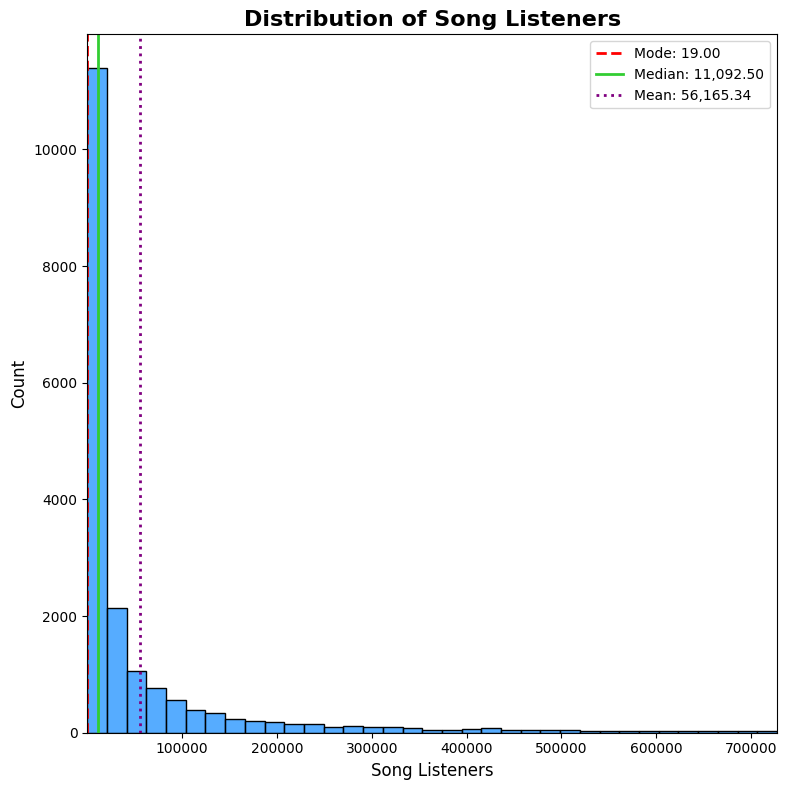

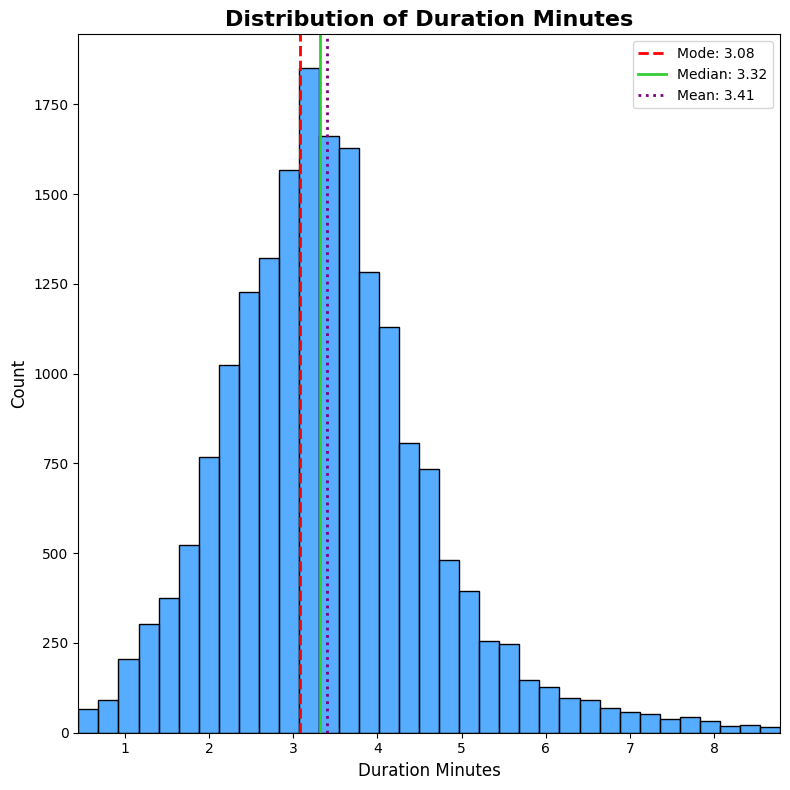

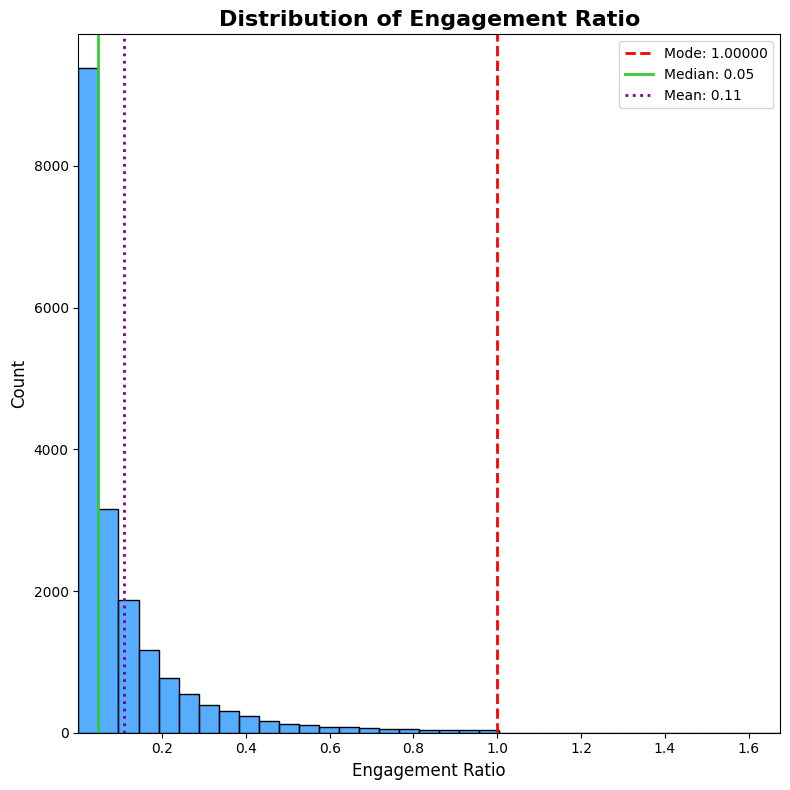

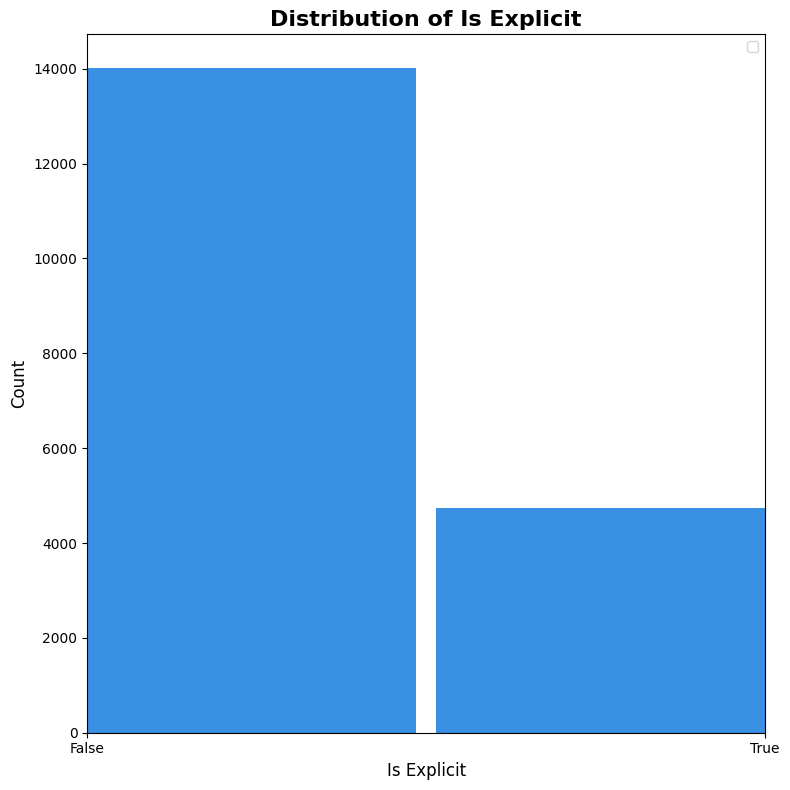

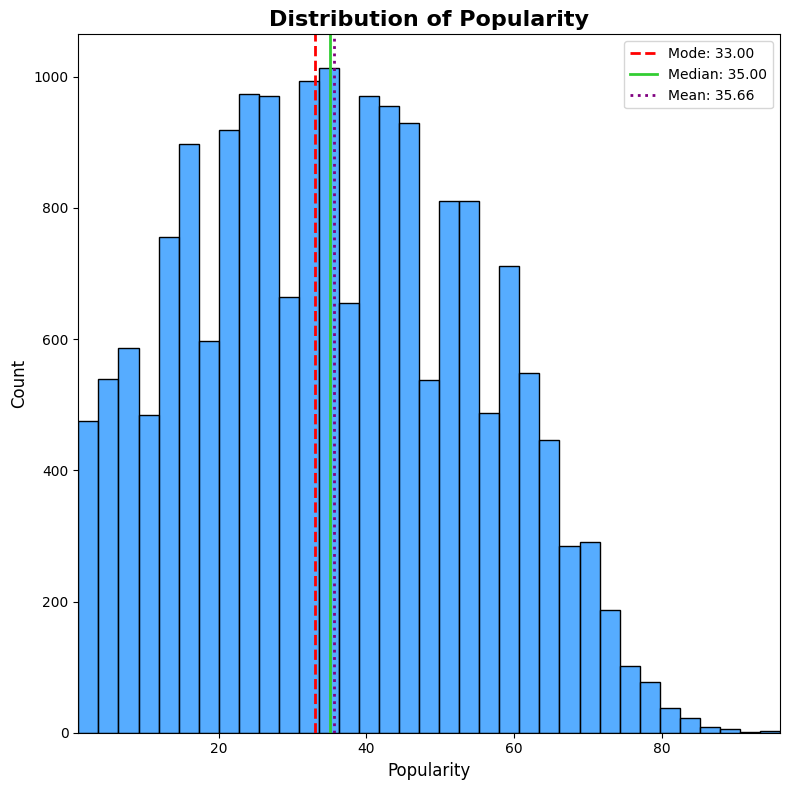

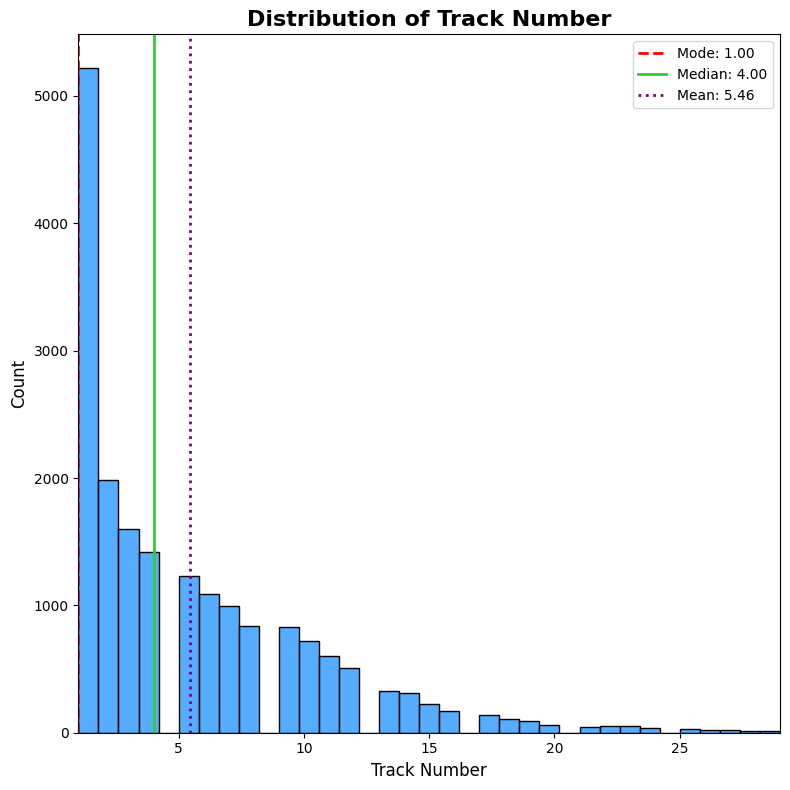

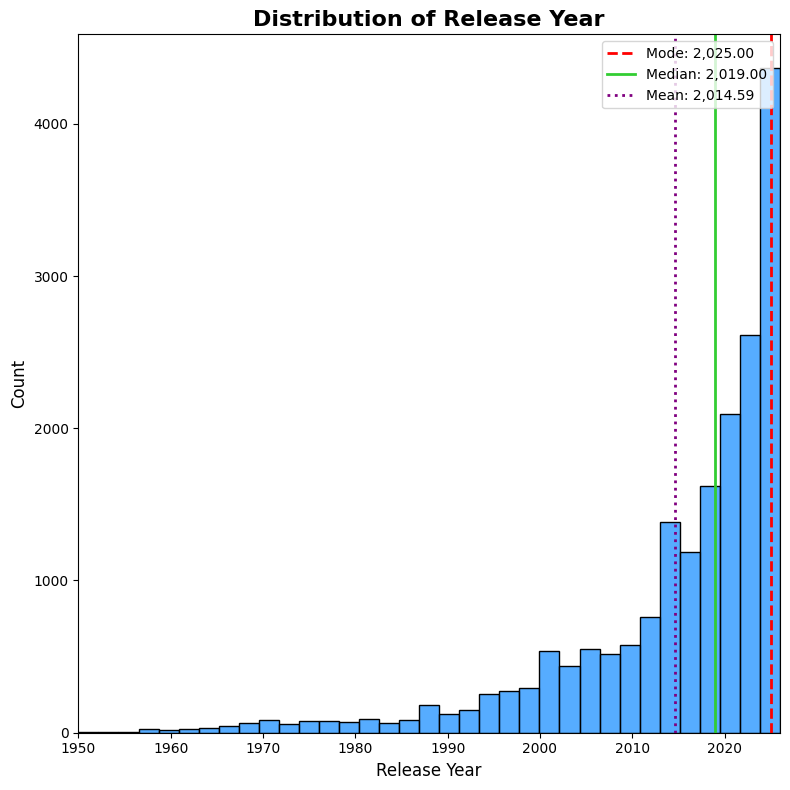

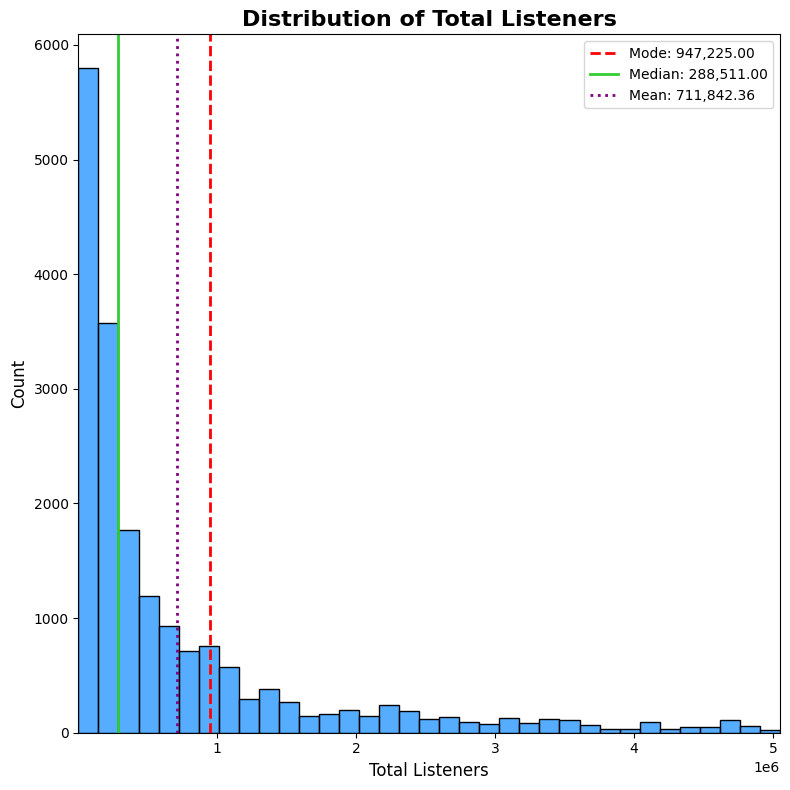

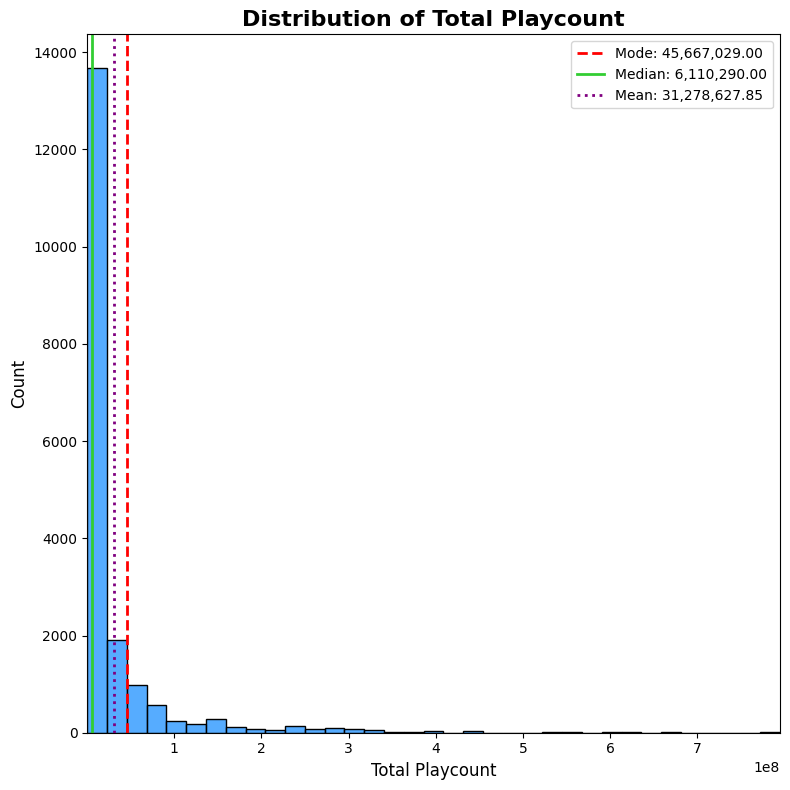

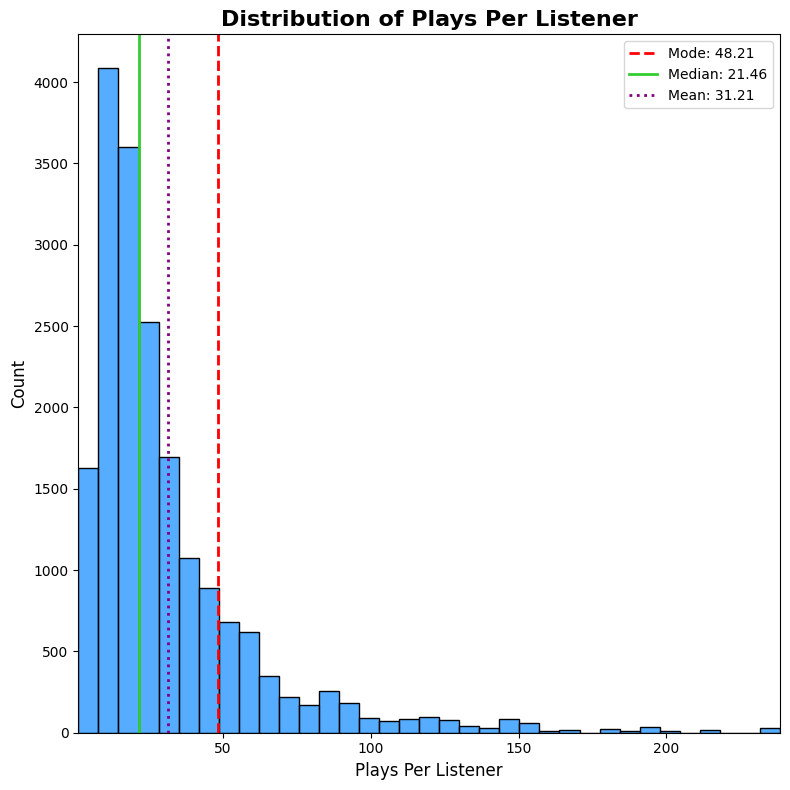

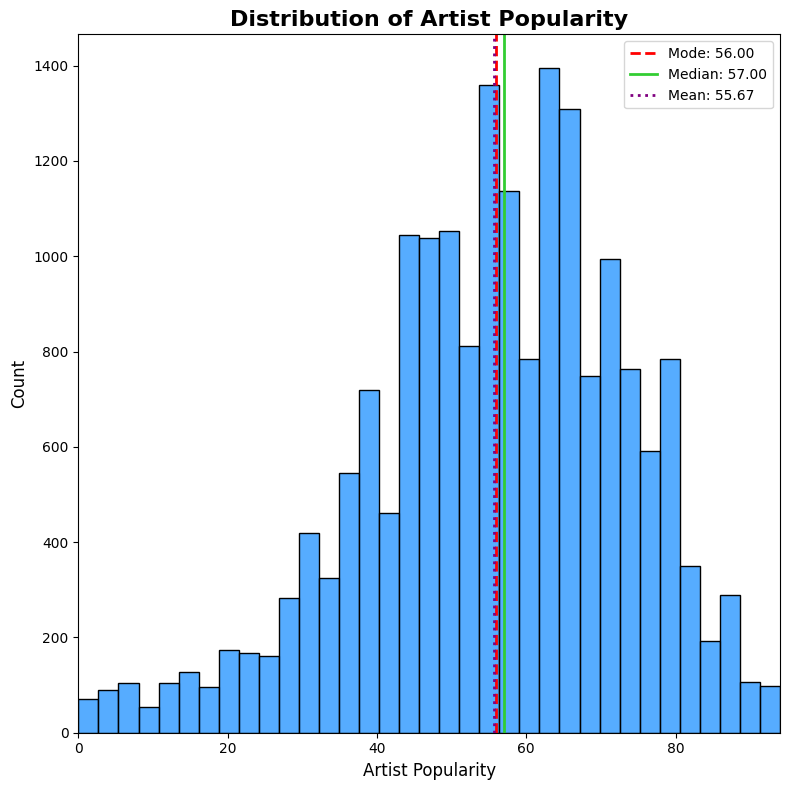

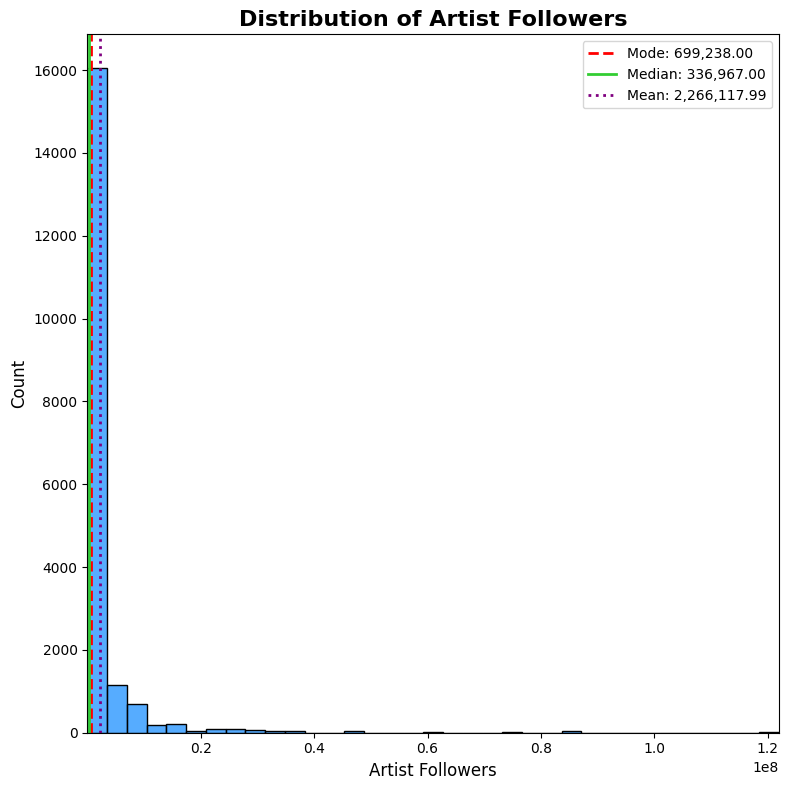

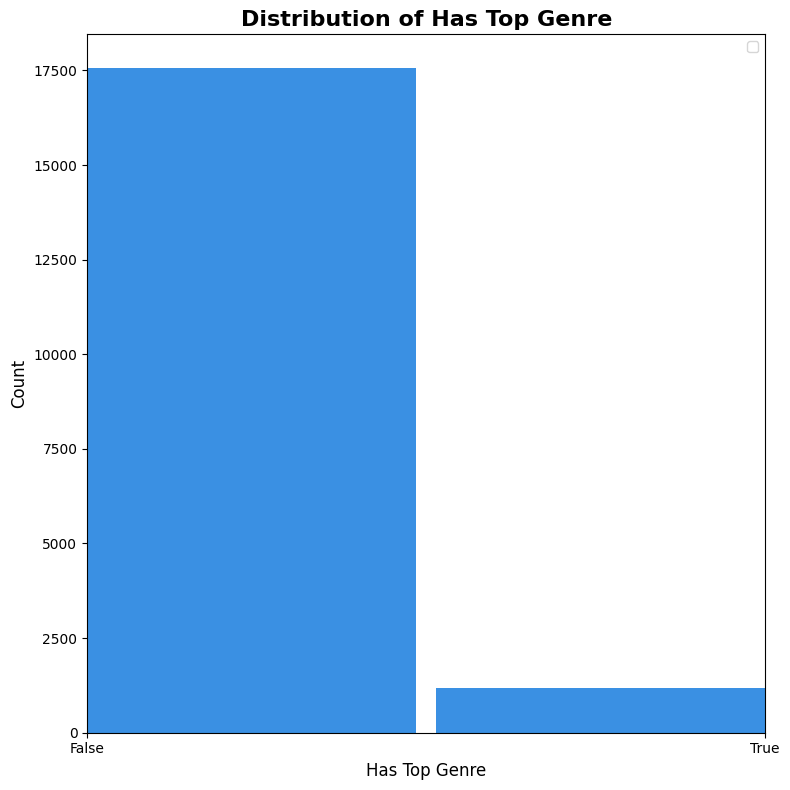

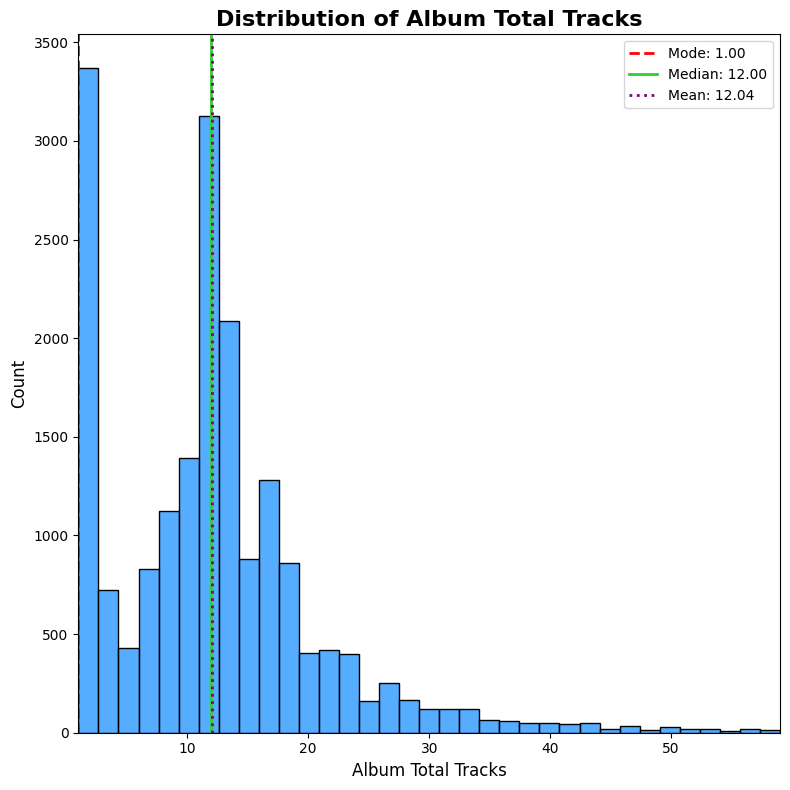

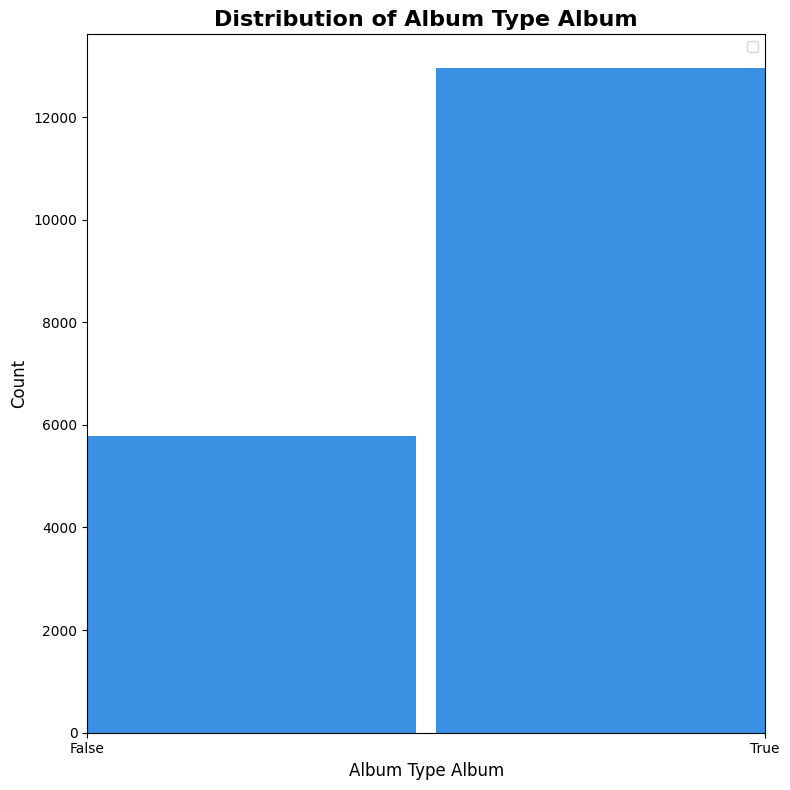

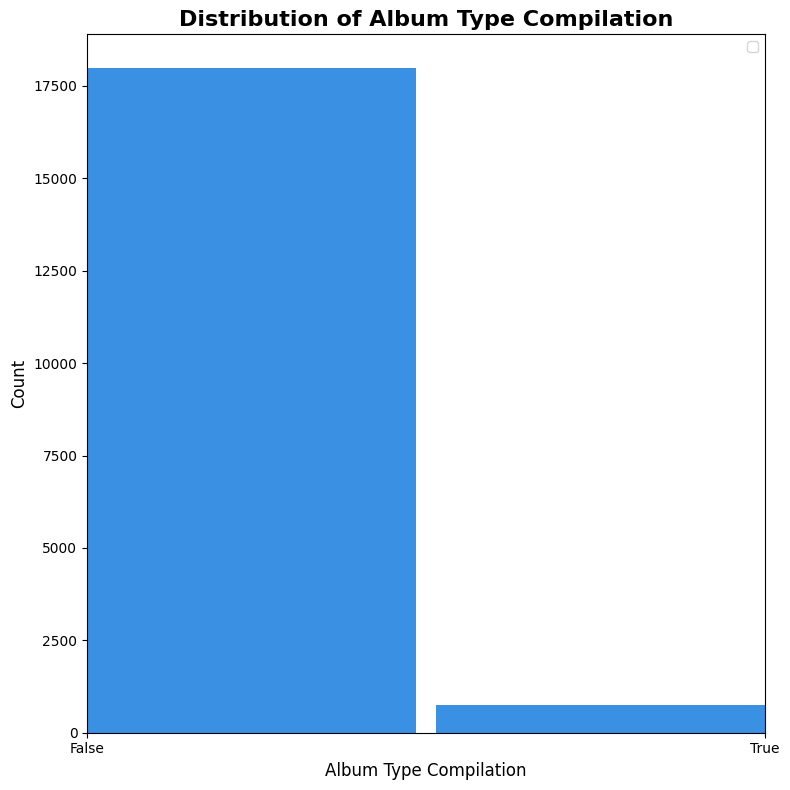

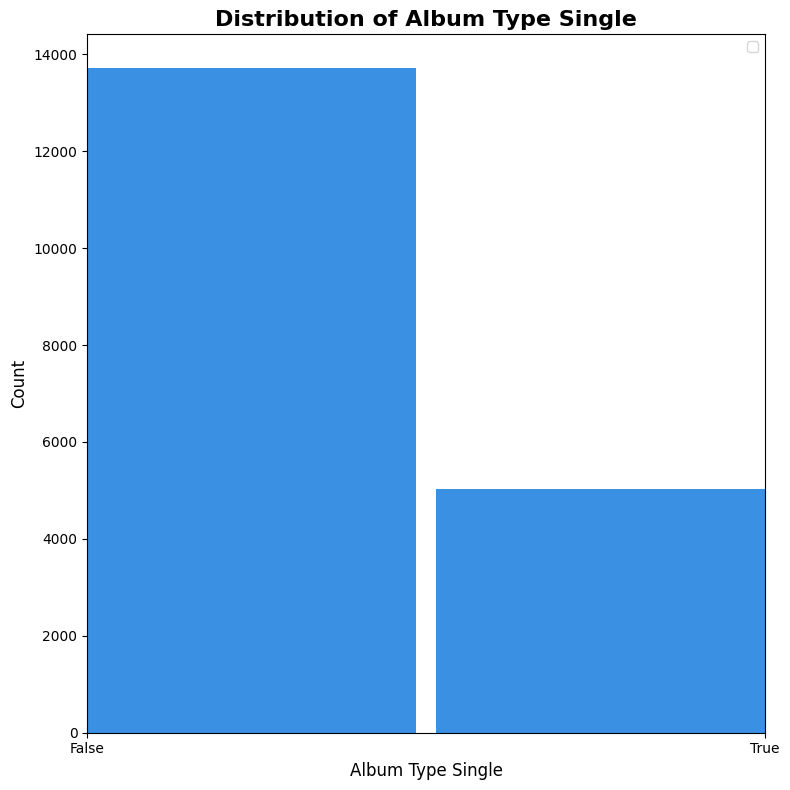

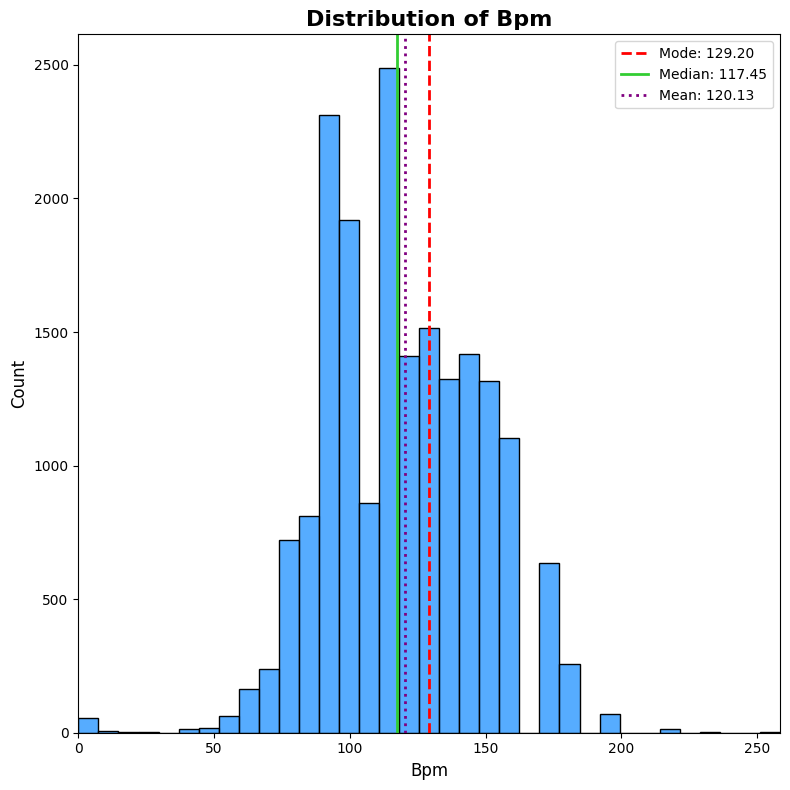

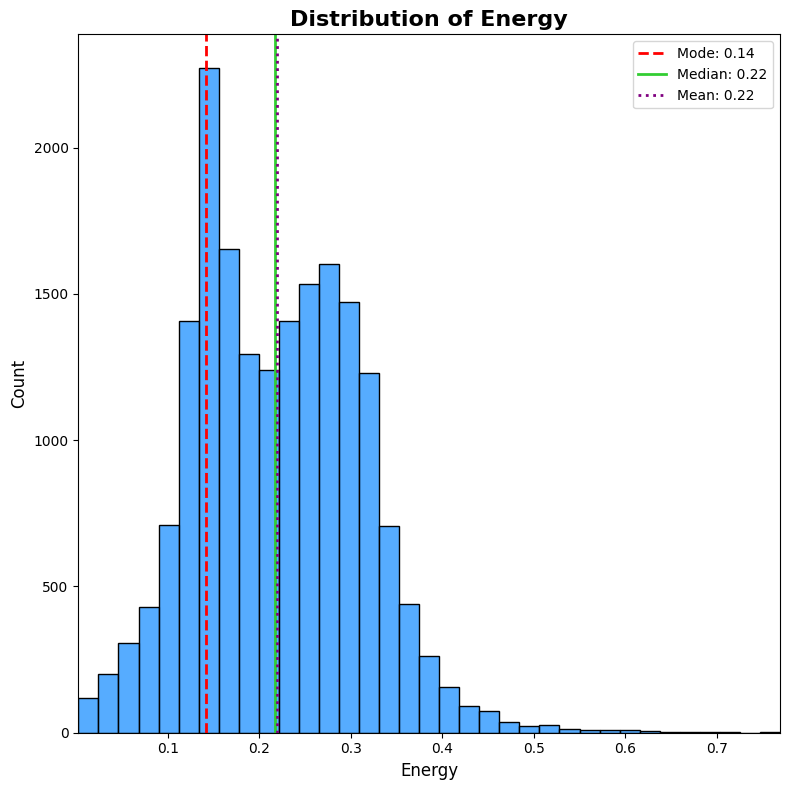

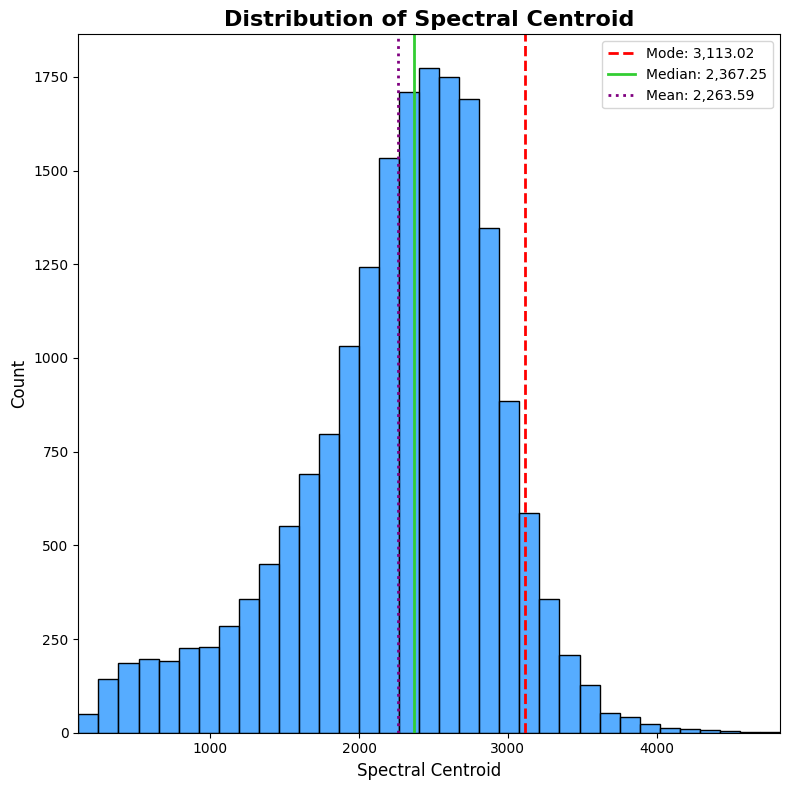

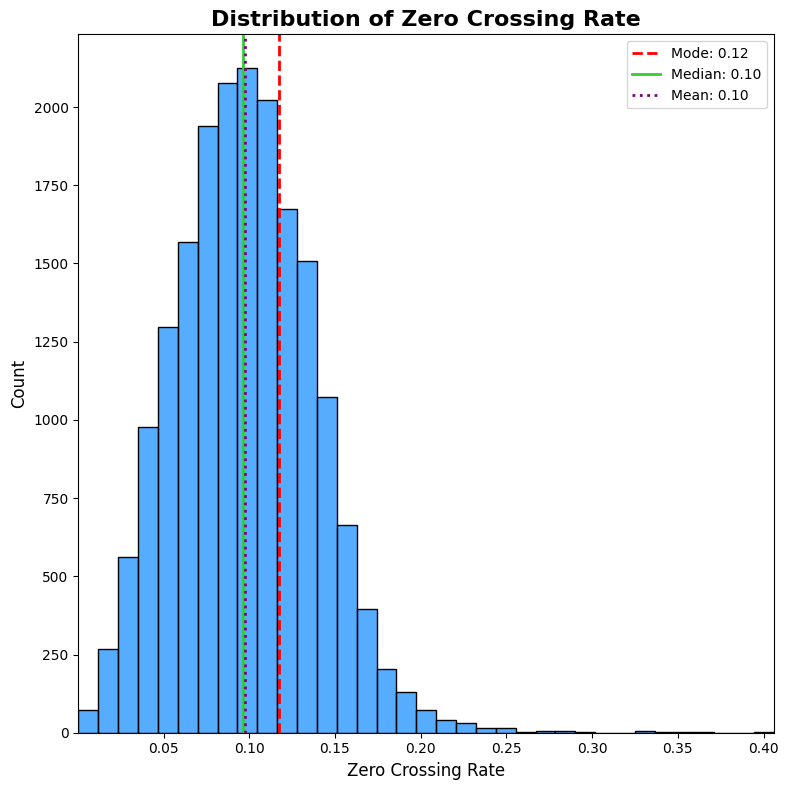

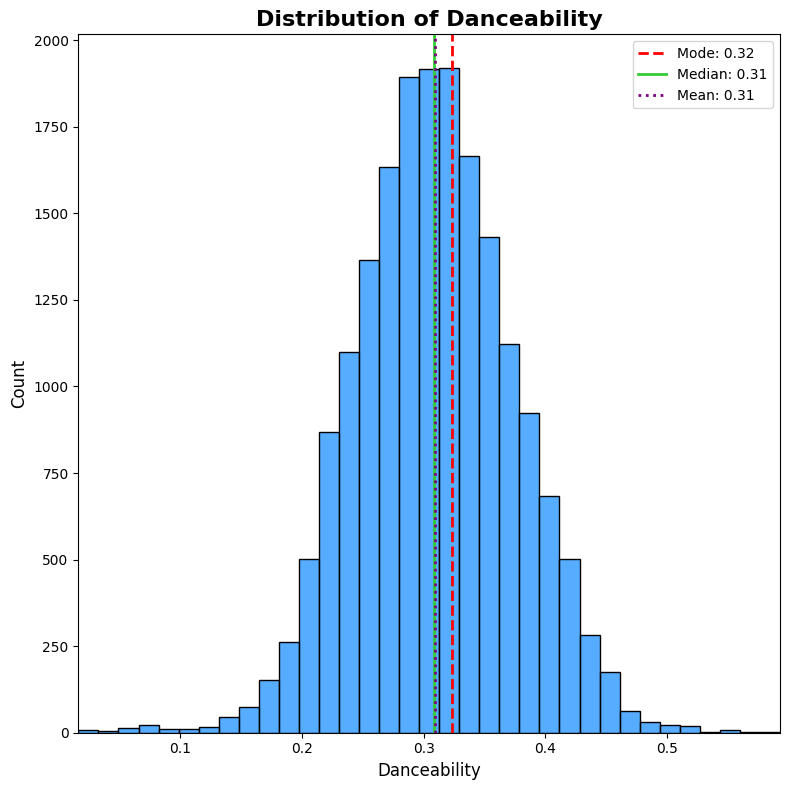

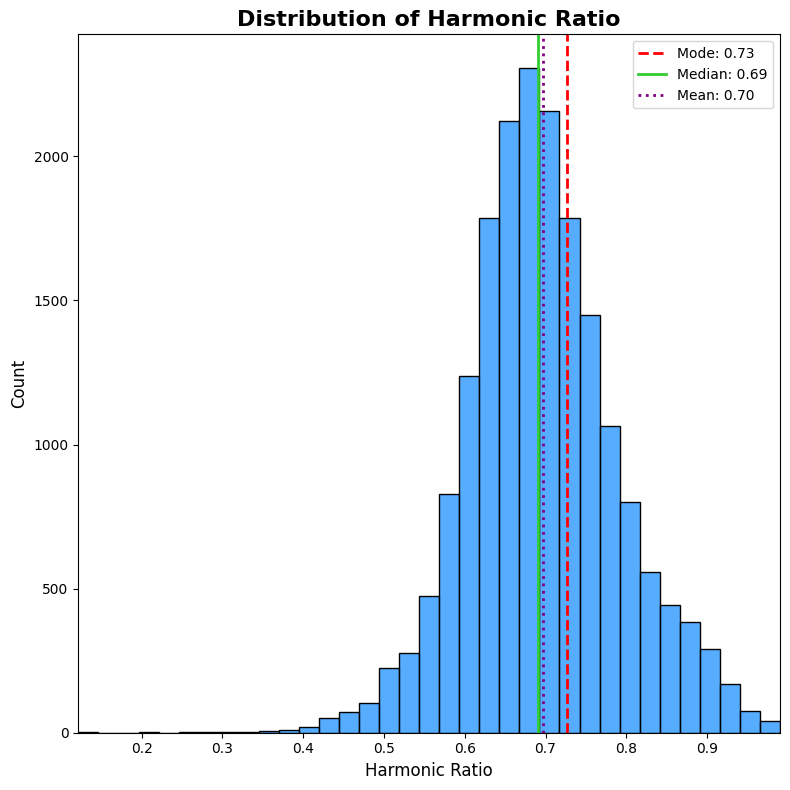

In [46]:
for col in df.columns:

    plt.figure(figsize=(8,8))

    if len(df[col].value_counts()) > 2:
        sns.histplot(x=df[col], bins=35, color='dodgerblue')

        mode= df[col].mode().iloc[0]
        median =df[col].median()
        mean = df[col].mean()

        if col == 'engagement_ratio':
            plt.axvline(x=mode, color='red', linestyle='--', label = f"Mode: {mode:,.5f}", linewidth=2 )
        else:
            plt.axvline(x=mode, color='red', linestyle='--', label = f"Mode: {mode:,.2f}", linewidth=2 )
        
        plt.axvline(x=median, color='limegreen', linestyle='-', label = f"Median: {median:,.2f}", linewidth=2 )
        plt.axvline(x=mean, color='purple', linestyle=':', label = f"Mean: {mean:,.2f}", linewidth=2 )
    
    else:
        sns.countplot(x=df[col], width = .97, color='dodgerblue')
        plt.xticks([0,1], ["False", "True"])

    x_label = (' '.join(col.split('_'))).title()

    plt.xlabel(x_label, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Distribution of {x_label}', fontsize=16, fontweight='bold')

    plt.legend(loc='upper right')


    plt.xlim(min(df[col]), max(df[col]))

    plt.tight_layout()

hist_cols=[]

### OBSERVATIONS:

- Song Listeners: highly right-skewed with a long tail
- Duration Minutes: roughly bell-shaped around 3-4 minutes with a slight right tail
- Engagement Ratio: strongly right-skewed
- Is Explicit: imbalanced binary with most songs being non-explicit
- Popularity: roughly unimodal, centered in the mid range (30s) with a tail towards higher popularity
- Track Number: right-skewed with most tracks early in the album and a long tail of larger track numbers
- Release Year: heavily skewed toward recent years with a long sparse tail into older decades
- Total Listeners: highly right-skewed with a small number of artists dominating
- Total Playcount: extremely right-skewed with a very long tail of large values
- Plays Per Listener: right-skewed with most values low and a long tail of heavy repeat listeners
- Artist Popularity: roughly bell-shaped centered around the mid‑50s to 60s
- Artist Followers: highly right-skewed with a few very large outliers
- Has Top Genre: imbalanced binary with most values False
- Album Total Tracks: right-skewed with most albums around 10–15 tracks and a long tail of longer albums
- Album Type Single: binary and imbalanced, fewer singles than non‑singles
- Album Type Compilation: binary and highly imbalanced, compilations are rare
- Album Type Album: binary and imbalanced, albums dominate
- BPM: roughly bell-shaped around ~120 with a slight right tail
- Energy: unimodal and slightly right-skewed
- Spectral Centroid: near‑normal with a mild right tail
- Zero Crossing Rate: unimodal with a right tail
- Danceability: near‑normal centered around ~0.30–0.35
- Harmonic Ratio: near‑normal centered around ~0.7




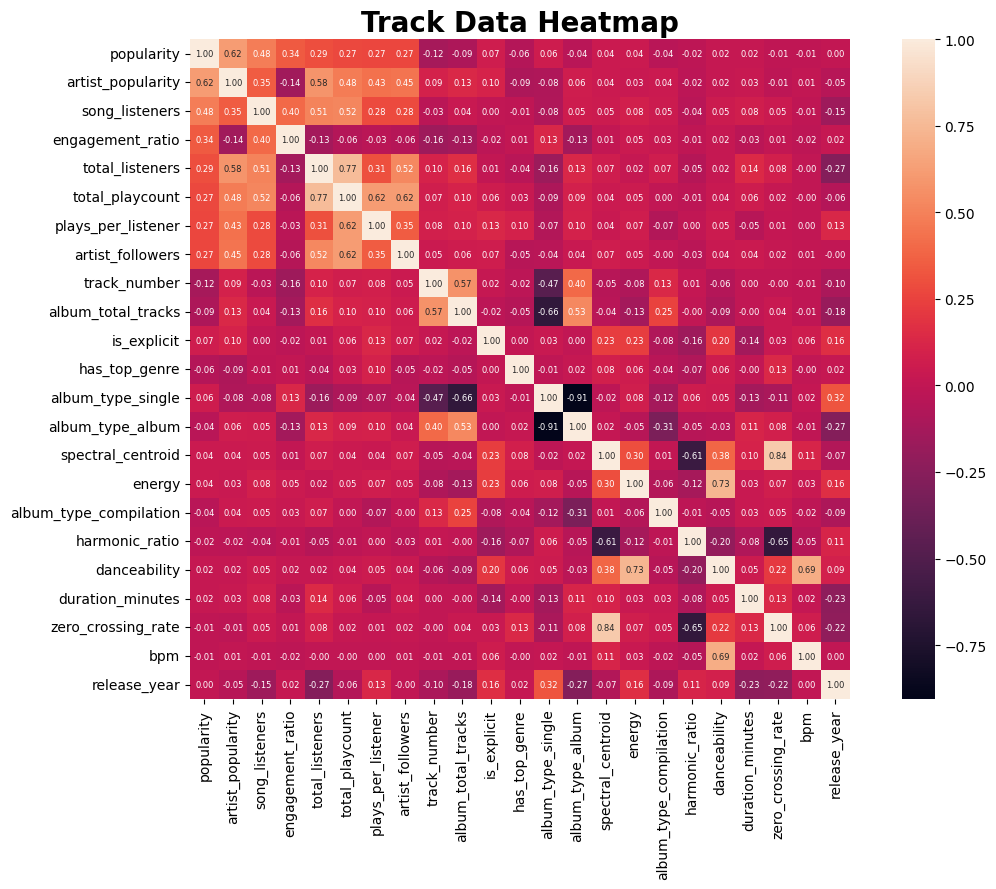

In [47]:
plt.figure(figsize=(12,9))

corr= df.corr()
order = corr['popularity'].abs().sort_values(ascending=False).index
sorted_corr = corr.loc[order, order]

sns.heatmap(sorted_corr,annot=True,annot_kws={'size':6}, fmt='.2f', square=True)
plt.title('Track Data Heatmap', fontsize=20, fontweight='bold')
plt.tight_layout()

### OBSERVATIONS

- Strongest positive correlation is artist_popularity (~0.63).
- Moderate correlations with song_listeners (~0.50), engagement_ratio (~0.33), total_listeners (~0.32), plays_per_listener (~0.29), total_playcount (~0.28), and artist_followers (~0.26).
- Audio features (bpm, energy, danceability, spectral_centroid, zero_crossing_rate, harmonic_ratio) show near‑zero linear correlation with popularity.
- Small negative correlation with track_number (~‑0.11) and album_total_tracks (~‑0.08).
- release_year is essentially neutral (~‑0.02).

### Implications for Modeling
- Audience/artist scale features dominate and are likely the strongest predictors.
- Audio features may help only via non‑linear interactions (consider tree‑based models).
- High collinearity among listener/follower/playcount features → use regularization (Ridge/Lasso) or tree models.
- Log‑transform heavy‑tailed count features (listeners/playcount/followers) to stabilize linear models.
- Track position has a small effect

## BASELINE TESTING

In [54]:
log_cols = ['song_listeners', 'total_listeners', 'total_playcount',
            'artist_followers', 'plays_per_listener']
for c in log_cols:
    if c in df.columns:
        df[c] = np.log1p(df[c])


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, mean_squared_error
def baseline_test(df):

    X = df.drop(['popularity'],axis=1)
    y= df['popularity']

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=4)

    ridge = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=1.0))
    ])

    lin_reg = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', LinearRegression())
    ])
    lasso = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Lasso(alpha=1.0))
    ])
    enet = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', ElasticNet(alpha=.01, l1_ratio=.5))
    ])

    for name,model in [('Ridge',ridge), ('Linear Regression',lin_reg), ('Lasso', lasso), ('Elastic Net', enet)]:

        model.fit(X_train, y_train)
        preds= model.predict(X_test)

        print(f"MSE For {name}:", mean_squared_error(y_test, preds))
        print(f"R2 For {name}:", r2_score(y_test, preds))
        print(f"RMSE For {name}:", root_mean_squared_error(y_test, preds))
        print(f"MAPE For {name}:", mean_absolute_percentage_error(y_test, preds))
        print()
    

In [59]:
baseline_test(df)

MSE For Ridge: 109.17752158921078
R2 For Ridge: 0.685033196220167
RMSE For Ridge: 10.448804792377489
MAPE For Ridge: 0.5241221198289925

MSE For Linear Regression: 109.09754947810718
R2 For Linear Regression: 0.6852639081822924
RMSE For Linear Regression: 10.444977236840067
MAPE For Linear Regression: 0.5237775388707654

MSE For Lasso: 125.14599932242598
R2 For Lasso: 0.6389656511829728
RMSE For Lasso: 11.186867270260516
MAPE For Lasso: 0.5961195128327855

MSE For Elastic Net: 109.23894415152813
R2 For Elastic Net: 0.6848559979484765
RMSE For Elastic Net: 10.451743593847302
MAPE For Elastic Net: 0.5264626879915518



In [51]:
df=df

In [52]:
df1= df.drop(['bpm', 'danceability', 'harmonic_ratio', 'spectral_centroid', 'zero_crossing_rate'],axis=1)

In [53]:
baseline_test(df1)

MSE For Ridge: 0.23220239817509863
R2 For Ridge: 0.5264420745349918
RMSE For Ridge: 0.48187384051751414
MAPE For Ridge: 0.1402110188677555

MSE For Linear Regression: 0.23220301554462777
R2 For Linear Regression: 0.5264408154599962
RMSE For Linear Regression: 0.4818744811095808
MAPE For Linear Regression: 0.14020955935634413

MSE For Lasso: 0.49130546818818244
R2 For Lasso: -0.0019775855603583192
RMSE For Lasso: 0.7009318570219094
MAPE For Lasso: 0.2157181256867733

MSE For Elastic Net: 0.2327107382612627
R2 For Elastic Net: 0.5254053562300713
RMSE For Elastic Net: 0.4824010139513211
MAPE For Elastic Net: 0.1408730807895017



(array([ 170.,  160.,  145.,  540.,  586., 1536., 2775., 4616., 6213.,
        2015.]),
 array([0.        , 0.19822712, 0.39645425, 0.59468137, 0.79290849,
        0.99113562, 1.18936274, 1.38758986, 1.58581699, 1.78404411,
        1.98227123]),
 <BarContainer object of 10 artists>)

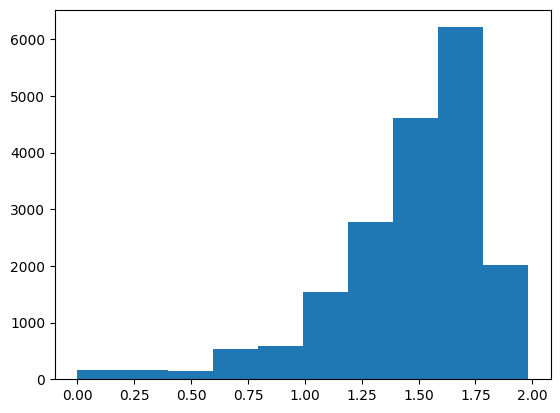

In [65]:
plt.hist(np.log10(df['popularity']))